<a href="https://colab.research.google.com/github/JiaxinLi-lipluszn/Temp_notebooks/blob/main/Supervised_perturb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unzip file

In [1]:
import os
os.chdir("/content/drive/Shareddrives/Documentation/Data/Perturb_10_classes/")

FileNotFoundError: ignored

In [21]:
!gunzip /content/drive/Shareddrives/Documentation/Data/Perturb_10_classes/rna_scale_perturb.csv.gz

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install emoji --upgrade

In [8]:
import os
os.chdir("/content/drive/MyDrive/scRNA/Stoeckiues/")

# Import

In [4]:
import sys
import argparse

import torch
from torch import nn
import torch.distributed as dist
import torch.backends.cudnn as cudnn
from torchvision import datasets
from torchvision import transforms as pth_transforms
from torchvision import models as torchvision_models
import pandas as pd
from torch.utils.data import Dataset
from functools import partial
import numpy as np
from torch import optim
from pathlib import Path
from torch.autograd import Variable

import os
import argparse
import os
import sys
import datetime
import time
import math
import json
from pathlib import Path

import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.distributed as dist
import torch.backends.cudnn as cudnn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
from torchvision import models as torchvision_models
import math
from functools import partial

import torch
import torch.nn as nn


import torch.nn.functional as F
from torch import optim
from torch.autograd import Variable

In [ ]:
np.

In [5]:
import utils
import vision_transformer_sc as vits
from utils import trunc_normal_

# Re import files

In [6]:
import os
os.chdir("/content/drive/MyDrive/scRNA/Stoeckiues/")

In [9]:
from importlib import reload  
import vision_transformer_sc as vits  
vits = reload(vits) 

In [ ]:
vits.test()

Here is the new vit!


# Load Data (perturb seq)


*   Pick 10 classes
*   4014 cells * 2000 genes




# Load Data Processed by Seurat

In [10]:
data = pd.read_csv("/content/drive/Shareddrives/Documentation/Data/Perturb_10_classes/rna_scale_perturb.csv", index_col=0)

In [11]:
expr_train = data

In [12]:
expr_train

,CELL_42982,CELL_9744,CELL_79203,CELL_93928,CELL_61444,CELL_49466,CELL_112865,CELL_142647,CELL_67074,CELL_106938,CELL_91884,CELL_64497,CELL_43505,CELL_123202,CELL_35750,CELL_149245,CELL_38432,CELL_182955,CELL_49138,CELL_176320,CELL_214174,CELL_157517,CELL_43774,CELL_71660,CELL_33939,CELL_107191,CELL_74837,CELL_82174,CELL_140322,CELL_99741,CELL_34110,CELL_172306,CELL_178336,CELL_109160,CELL_59296,CELL_182363,CELL_218281,CELL_112000,CELL_212493,CELL_22866,...,CELL_66848,CELL_154867,CELL_83375,CELL_44070,CELL_139445,CELL_134105,CELL_189449,CELL_19189,CELL_177545,CELL_78446,CELL_39993,CELL_132846,CELL_65225,CELL_50563,CELL_166744,CELL_192818,CELL_190979,CELL_207914,CELL_175525,CELL_147421,CELL_127596,CELL_137229,CELL_189837,CELL_138707,CELL_44158,CELL_118808,CELL_197539,CELL_31012,CELL_21858,CELL_146471,CELL_6331,CELL_216883,CELL_115175,CELL_112201,CELL_131759,CELL_82183,CELL_167090,CELL_84014,CELL_95816,CELL_183125
ZFAS1,-0.203391,-0.138041,0.077844,0.698922,-0.306865,0.428026,-0.374979,0.413997,0.252716,0.159874,0.356046,0.175418,0.188525,0.798264,0.506143,-0.071404,0.141464,0.051486,0.225867,0.478484,0.006786,-0.308394,0.072596,-0.047422,0.177056,-0.074552,0.184675,0.163065,0.750291,0.079104,-0.150826,0.460939,0.583493,1.232261,0.267449,0.262817,-0.163260,1.743589,1.290760,0.212898,...,-5.295258,0.409806,-0.145464,0.294670,0.219363,-0.056596,0.159945,-0.472481,0.062911,-5.295258,1.504701,1.372864,0.283779,0.800709,0.011905,0.588833,0.914544,0.158577,0.511113,0.604595,0.369739,0.056902,-0.152581,0.463345,-0.305254,0.104992,0.470038,-0.204000,-5.295258,-0.166185,0.000709,-0.245496,0.691052,0.182271,0.724636,1.067801,0.060704,0.118638,0.076006,-0.298343
HSPA5,-0.154000,-0.195884,-0.068993,0.624077,-0.171813,0.247967,-0.250726,0.413487,-0.020962,-0.063929,0.572785,0.031690,0.087626,1.062414,0.805845,0.019248,0.178510,-0.053431,-0.007802,0.645034,-0.045552,-0.140791,0.215771,-0.256369,0.000105,0.077406,0.307573,-0.162441,0.869659,-0.154661,-0.260873,0.362426,0.583335,-5.305272,0.432531,0.229379,0.088192,-5.305272,1.104065,0.062610,...,0.815568,0.467831,-0.218101,0.335753,0.259387,0.151476,0.287586,-0.384074,0.194170,-0.077039,1.477687,0.984838,0.185456,0.754527,0.127191,0.702287,0.915077,0.102426,0.590395,0.486226,0.482091,0.113579,0.057273,0.322255,-0.554520,0.103845,0.052089,-0.099246,-0.003492,-0.036433,-0.134043,-0.112641,0.394955,0.105224,0.231645,-5.305272,0.134682,0.025113,0.172344,-0.422169
SH3BGRL3,-0.286918,0.062138,-0.072735,0.780556,-0.000452,0.191457,-0.140070,0.576717,-0.024873,-0.203106,0.617668,0.365564,-0.010531,-5.284361,-5.284361,-0.029829,0.061271,-0.014199,-0.250328,0.617490,0.115598,-0.205681,0.339557,-0.084611,0.131064,0.046751,0.231860,-0.165854,0.668606,0.199773,-0.239792,0.468347,0.705176,1.296838,0.337705,0.270921,-0.035556,-5.284361,1.096316,-0.019969,...,0.998967,0.388577,-0.296543,0.262592,0.087615,-0.246307,0.181064,-0.053170,0.308397,0.051103,1.313237,0.977486,0.141739,0.628423,0.110867,0.638963,1.206251,0.226372,0.661145,0.428034,0.476439,0.167466,0.020067,0.650778,-0.556530,0.099498,0.509205,0.011170,0.163253,-0.545190,0.092813,-0.160091,0.714047,0.176666,0.503237,1.061024,-0.003767,0.170106,0.141765,-0.352116
TUBB,-0.255445,-0.020838,-0.203839,0.550572,-0.182002,0.084617,-0.327408,0.364167,0.090295,-0.257656,0.258008,0.302182,0.001257,0.740650,-5.821609,-0.011811,-0.011594,0.161006,-0.031759,0.593631,0.062548,-0.180893,0.349688,-0.181962,0.097745,-0.211532,0.128744,0.047519,0.743724,0.122450,-0.236770,0.387093,0.660470,1.069222,0.341969,0.256673,0.121610,1.552191,1.206565,0.073763,...,0.967140,0.299936,-0.336106,0.255232,0.063808,-0.024893,0.309674,-0.139787,0.330436,0.081775,1.310894,1.092748,0.294174,0.479146,0.119359,0.469575,1.098691,0.249276,0.610143,0.599096,0.306434,-0.005214,-0.113064,0.221906,-0.148152,-0.015806,0.468781,-0.143848,0.094563,-0.065328,0.109056,-0.099295,0.529503,0.342334,0.367972,-5.821609,0.000916,0.033160,0.030349,-0.225546
SQSTM1,-0.138784,-0.026284,0.301265,0.476996,-0.0

In [27]:
expr_test = pd.read_csv("/content/drive/Shareddrives/Documentation/Data/Perturb_10_classes/rna_scale_perturb_test.csv", index_col=0)

In [28]:
expr_test

,CELL_3589,CELL_4253,CELL_6039,CELL_9591,CELL_12240,CELL_14575,CELL_18115,CELL_18760,CELL_19023,CELL_21543,CELL_24685,CELL_28815,CELL_31500,CELL_31547,CELL_36126,CELL_39157,CELL_39230,CELL_39300,CELL_40359,CELL_44485,CELL_48638,CELL_56125,CELL_57219,CELL_58016,CELL_60110,CELL_60769,CELL_61115,CELL_62932,CELL_63331,CELL_64592,CELL_64615,CELL_65222,CELL_65980,CELL_67556,CELL_68975,CELL_70200,CELL_71106,CELL_71707,CELL_72007,CELL_75648,...,CELL_140367,CELL_140500,CELL_140974,CELL_144390,CELL_145607,CELL_147163,CELL_148412,CELL_152267,CELL_152814,CELL_152973,CELL_154047,CELL_156612,CELL_156977,CELL_158998,CELL_160942,CELL_163513,CELL_163669,CELL_165250,CELL_165933,CELL_173678,CELL_178368,CELL_179139,CELL_179259,CELL_180912,CELL_184343,CELL_184493,CELL_185277,CELL_186865,CELL_188540,CELL_190819,CELL_194871,CELL_197364,CELL_199181,CELL_200244,CELL_207279,CELL_209925,CELL_211635,CELL_214559,CELL_215376,CELL_218325
HLA-B,0.073631,-2.267446,-2.267446,-2.267446,0.344675,-2.267446,-2.267446,0.314961,0.030888,-0.186429,-2.267446,0.154670,-2.267446,0.234110,0.188532,0.160757,-2.267446,0.624246,-2.267446,0.116368,-2.267446,-0.054736,0.248739,0.565159,-2.267446,0.627968,0.472159,0.322292,0.326069,0.330327,0.618463,0.536910,0.575772,0.263104,0.477757,0.312169,0.323578,0.417601,0.684863,0.164272,...,0.420830,-2.267446,0.196548,0.495795,0.537247,0.475703,0.626221,0.500852,0.327865,0.587290,0.553349,0.591510,0.647228,0.392903,0.771712,0.555348,0.486856,0.716232,0.668580,0.615865,0.895382,0.452043,1.023259,0.446805,0.635820,0.508889,0.130447,0.514031,0.849434,0.483363,0.552258,0.580034,0.883191,0.737411,0.586671,0.573416,0.376897,0.432062,0.530707,0.302458
GBP1,0.167667,-1.543437,-1.543437,-1.543437,0.312646,0.263778,-1.543437,-1.543437,-1.543437,0.145249,0.159937,-1.543437,-1.543437,-1.543437,0.449519,-1.543437,-1.543437,-1.543437,-1.543437,-1.543437,0.114441,0.252114,-1.543437,0.944585,0.741754,0.882764,0.835601,0.850888,0.860319,0.698246,0.834902,0.930695,0.930469,0.804090,0.813073,0.842854,0.681227,0.924582,0.995662,0.811234,...,0.915658,1.150510,0.734687,0.877932,0.555888,0.587822,0.586769,0.470611,0.075613,0.481886,0.519396,0.653993,0.674963,0.465523,0.851652,0.237848,0.237536,-1.543437,-1.543437,-1.543437,0.560903,0.516482,0.777216,0.515862,0.436904,0.544661,0.402385,0.364152,-1.543437,0.245244,0.559647,0.409436,0.793977,0.721748,0.613522,0.426568,0.448571,0.597126,0.634249,0.446462
STAT1,-1.824661,0.397355,0.355196,-1.824661,-1.824661,0.142153,-1.824661,0.455952,0.205077,-1.824661,-1.824661,-1.824661,-1.824661,-1.824661,-1.824661,0.438107,0.085799,-1.824661,0.134016,0.280567,0.189183,0.129459,0.276581,0.771076,0.548995,0.782041,0.715479,0.805656,0.567965,0.608453,0.927988,0.711024,0.760504,0.686944,0.707152,0.816909,0.611433,0.942749,0.822237,0.610630,...,0.757027,-1.824661,0.533223,0.732943,0.474479,0.467507,0.474135,0.498059,0.200112,0.379523,0.533406,0.381412,0.651404,0.486899,0.673466,0.440415,0.409353,0.618231,0.551895,0.548743,0.762354,0.442121,-1.824661,0.535065,0.330568,0.447842,0.411109,0.455842,0.396610,0.361635,0.547802,0.445549,0.719175,-1.824661,0.560905,0.399926,0.270552,0.504940,0.573798,0.386405
HIST1H4C,-0.113950,0.726859,0.575405,-2.272376,0.425993,0.632872,-2.272376,0.488178,0.418290,0.365467,0.537511,0.686952,-2.272376,0.424602,0.455167,0.213154,0.083121,-2.272376,0.145316,0.426162,0.117990,0.309081,0.377983,0.429435,-2.272376,0.728975,-2.272376,0.818936,0.453143,0.220004,-2.272376,0.927751,0.591074,0.178002,0.653676,0.368140,0.612622,-2.272376,-2.272376,0.380554,...,0.659951,0.840455,0.604321,0.604102,0.106107,0.567441,0.292013,0.477006,-0.230070,0.352815,0.015197,0.563305,0.692468,0.430609,0.369821,0.203033,0.437458,0.713546,-2.272376,0.663596,0.382087,-2.272376,0.654948,0.486159,-2.272376,0.335945,0.652733,0.523209,-2.272376,0.331790,-2.272376,0.320244,0.478652,0.850972,0.467994,-0.017776,0.103101,-0.080479,-2.272376,0.506338
WARS,-1.637812,-1.637812,-1.637812,0.457256,-1.637812,-1.637812,-1.637812,-1.637812,-1.6378

In [ ]:
expr_train

,CELL_42982,CELL_9744,CELL_79203,CELL_93928,CELL_61444,CELL_49466,CELL_112865,CELL_142647,CELL_67074,CELL_106938,CELL_91884,CELL_64497,CELL_43505,CELL_123202,CELL_35750,CELL_149245,CELL_38432,CELL_182955,CELL_49138,CELL_176320,CELL_214174,CELL_157517,CELL_43774,CELL_71660,CELL_33939,CELL_107191,CELL_74837,CELL_82174,CELL_140322,CELL_99741,CELL_34110,CELL_172306,CELL_178336,CELL_109160,CELL_59296,CELL_182363,CELL_218281,CELL_112000,CELL_212493,CELL_22866,...,CELL_66848,CELL_154867,CELL_83375,CELL_44070,CELL_139445,CELL_134105,CELL_189449,CELL_19189,CELL_177545,CELL_78446,CELL_39993,CELL_132846,CELL_65225,CELL_50563,CELL_166744,CELL_192818,CELL_190979,CELL_207914,CELL_175525,CELL_147421,CELL_127596,CELL_137229,CELL_189837,CELL_138707,CELL_44158,CELL_118808,CELL_197539,CELL_31012,CELL_21858,CELL_146471,CELL_6331,CELL_216883,CELL_115175,CELL_112201,CELL_131759,CELL_82183,CELL_167090,CELL_84014,CELL_95816,CELL_183125
ZFAS1,-0.203391,-0.138041,0.077844,0.698922,-0.306865,0.428026,-0.374979,0.413997,0.252716,0.159874,0.356046,0.175418,0.188525,0.798264,0.506143,-0.071404,0.141464,0.051486,0.225867,0.478484,0.006786,-0.308394,0.072596,-0.047422,0.177056,-0.074552,0.184675,0.163065,0.750291,0.079104,-0.150826,0.460939,0.583493,1.232261,0.267449,0.262817,-0.163260,1.743589,1.290760,0.212898,...,-5.295258,0.409806,-0.145464,0.294670,0.219363,-0.056596,0.159945,-0.472481,0.062911,-5.295258,1.504701,1.372864,0.283779,0.800709,0.011905,0.588833,0.914544,0.158577,0.511113,0.604595,0.369739,0.056902,-0.152581,0.463345,-0.305254,0.104992,0.470038,-0.204000,-5.295258,-0.166185,0.000709,-0.245496,0.691052,0.182271,0.724636,1.067801,0.060704,0.118638,0.076006,-0.298343
HSPA5,-0.154000,-0.195884,-0.068993,0.624077,-0.171813,0.247967,-0.250726,0.413487,-0.020962,-0.063929,0.572785,0.031690,0.087626,1.062414,0.805845,0.019248,0.178510,-0.053431,-0.007802,0.645034,-0.045552,-0.140791,0.215771,-0.256369,0.000105,0.077406,0.307573,-0.162441,0.869659,-0.154661,-0.260873,0.362426,0.583335,-5.305272,0.432531,0.229379,0.088192,-5.305272,1.104065,0.062610,...,0.815568,0.467831,-0.218101,0.335753,0.259387,0.151476,0.287586,-0.384074,0.194170,-0.077039,1.477687,0.984838,0.185456,0.754527,0.127191,0.702287,0.915077,0.102426,0.590395,0.486226,0.482091,0.113579,0.057273,0.322255,-0.554520,0.103845,0.052089,-0.099246,-0.003492,-0.036433,-0.134043,-0.112641,0.394955,0.105224,0.231645,-5.305272,0.134682,0.025113,0.172344,-0.422169
SH3BGRL3,-0.286918,0.062138,-0.072735,0.780556,-0.000452,0.191457,-0.140070,0.576717,-0.024873,-0.203106,0.617668,0.365564,-0.010531,-5.284361,-5.284361,-0.029829,0.061271,-0.014199,-0.250328,0.617490,0.115598,-0.205681,0.339557,-0.084611,0.131064,0.046751,0.231860,-0.165854,0.668606,0.199773,-0.239792,0.468347,0.705176,1.296838,0.337705,0.270921,-0.035556,-5.284361,1.096316,-0.019969,...,0.998967,0.388577,-0.296543,0.262592,0.087615,-0.246307,0.181064,-0.053170,0.308397,0.051103,1.313237,0.977486,0.141739,0.628423,0.110867,0.638963,1.206251,0.226372,0.661145,0.428034,0.476439,0.167466,0.020067,0.650778,-0.556530,0.099498,0.509205,0.011170,0.163253,-0.545190,0.092813,-0.160091,0.714047,0.176666,0.503237,1.061024,-0.003767,0.170106,0.141765,-0.352116
TUBB,-0.255445,-0.020838,-0.203839,0.550572,-0.182002,0.084617,-0.327408,0.364167,0.090295,-0.257656,0.258008,0.302182,0.001257,0.740650,-5.821609,-0.011811,-0.011594,0.161006,-0.031759,0.593631,0.062548,-0.180893,0.349688,-0.181962,0.097745,-0.211532,0.128744,0.047519,0.743724,0.122450,-0.236770,0.387093,0.660470,1.069222,0.341969,0.256673,0.121610,1.552191,1.206565,0.073763,...,0.967140,0.299936,-0.336106,0.255232,0.063808,-0.024893,0.309674,-0.139787,0.330436,0.081775,1.310894,1.092748,0.294174,0.479146,0.119359,0.469575,1.098691,0.249276,0.610143,0.599096,0.306434,-0.005214,-0.113064,0.221906,-0.148152,-0.015806,0.468781,-0.143848,0.094563,-0.065328,0.109056,-0.099295,0.529503,0.342334,0.367972,-5.821609,0.000916,0.033160,0.030349,-0.225546
SQSTM1,-0.138784,-0.026284,0.301265,0.476996,-0.0

In [ ]:
type(expr_test.index)

pandas.core.indexes.base.Index

In [29]:
Features = expr_test.index.intersection(expr_train.index)

In [30]:
Features

Index(['HLA-B', 'GBP1', 'STAT1', 'HIST1H4C', 'WARS', 'ID1', 'RPS4Y1', 'CD74',
       'ID3', 'MT2A',
       ...
       'LGALS1', 'RNF7', 'SRP9', 'SNX3', 'ADRM1', 'SQSTM1', 'AC116366.1',
       'CST3', 'EDF1', 'POLR2L'],
      dtype='object', length=1664)

In [31]:
expr_train = expr_train.reindex(index = Features)
expr_test = expr_test.reindex(index= Features)

In [32]:
expr_train

,CELL_42982,CELL_9744,CELL_79203,CELL_93928,CELL_61444,CELL_49466,CELL_112865,CELL_142647,CELL_67074,CELL_106938,CELL_91884,CELL_64497,CELL_43505,CELL_123202,CELL_35750,CELL_149245,CELL_38432,CELL_182955,CELL_49138,CELL_176320,CELL_214174,CELL_157517,CELL_43774,CELL_71660,CELL_33939,CELL_107191,CELL_74837,CELL_82174,CELL_140322,CELL_99741,CELL_34110,CELL_172306,CELL_178336,CELL_109160,CELL_59296,CELL_182363,CELL_218281,CELL_112000,CELL_212493,CELL_22866,...,CELL_66848,CELL_154867,CELL_83375,CELL_44070,CELL_139445,CELL_134105,CELL_189449,CELL_19189,CELL_177545,CELL_78446,CELL_39993,CELL_132846,CELL_65225,CELL_50563,CELL_166744,CELL_192818,CELL_190979,CELL_207914,CELL_175525,CELL_147421,CELL_127596,CELL_137229,CELL_189837,CELL_138707,CELL_44158,CELL_118808,CELL_197539,CELL_31012,CELL_21858,CELL_146471,CELL_6331,CELL_216883,CELL_115175,CELL_112201,CELL_131759,CELL_82183,CELL_167090,CELL_84014,CELL_95816,CELL_183125
HLA-B,0.102805,-2.264989,0.508431,0.596618,0.298615,0.349778,0.250259,-2.264989,0.428681,0.331066,0.602815,0.483546,-2.264989,0.876293,-2.264989,0.448074,0.204672,0.482561,0.318051,0.740937,0.463923,0.322796,0.466626,0.371466,-2.264989,0.386741,0.341133,0.349321,0.750078,0.287065,0.204797,0.617003,0.767560,0.894481,0.571599,0.549483,0.508609,-2.264989,1.065924,0.354285,...,0.816828,0.626073,0.240107,0.317758,0.345488,0.401366,0.517063,0.175743,0.612485,0.363091,-2.264989,0.838792,0.479460,0.563719,0.533018,0.736660,1.015634,0.552219,0.744348,0.750418,0.497015,0.404421,0.442740,0.586319,-2.264989,0.373911,0.661178,0.262269,-2.264989,0.396070,0.224284,0.351286,0.654947,0.449917,0.608606,0.753455,0.455894,0.446728,0.261332,0.326849
GBP1,0.425356,-1.561113,0.765424,0.939052,0.612413,-1.561113,0.561149,0.749466,0.666579,0.640310,0.943355,0.727616,0.483652,0.881977,-1.561113,0.438887,-1.561113,0.531593,-1.561113,0.778853,0.474044,0.444829,0.602879,0.627646,-1.561113,0.706857,0.725820,0.664920,0.966922,0.698022,0.376448,0.580971,0.679109,1.136170,0.778284,-1.561113,0.582934,1.276109,1.059609,-1.561113,...,0.970928,0.712714,0.614621,0.540235,0.659426,0.536684,0.636540,-1.561113,0.541864,0.672038,-1.561113,1.108298,0.750740,-1.561113,0.539726,0.786600,-1.561113,0.523554,0.648517,0.655443,0.816379,0.704572,0.463774,0.897469,-1.561113,0.746222,-1.561113,-1.561113,-1.561113,0.538015,0.523800,0.521321,0.896987,0.773417,0.786034,0.938217,0.587992,0.710343,0.721184,0.434895
STAT1,-1.971030,-1.971030,0.634846,0.791701,0.468369,-1.971030,0.406589,-1.971030,0.518653,0.530995,0.749945,0.637215,0.340126,0.983575,-1.971030,0.394270,-1.971030,0.421663,0.336153,0.622179,0.456555,0.343493,0.476692,0.489385,0.445270,0.533522,0.624192,0.540416,0.814629,0.600970,0.282736,0.451591,0.564049,1.040378,0.669592,0.356296,0.523172,1.261613,1.000496,-1.971030,...,0.907875,0.592646,0.407193,0.404927,0.471683,0.551966,0.500954,0.159276,0.611784,0.550512,-1.971030,0.970774,0.583809,-1.971030,0.449883,0.704422,0.940932,0.454132,0.629289,0.676668,0.632551,0.567744,0.409246,0.769894,0.200357,0.595605,0.608805,-1.971030,0.318611,0.439216,-1.971030,0.414678,0.803178,0.588917,0.669367,0.944557,0.445320,0.570574,0.521180,0.338805
HIST1H4C,0.172479,0.458433,0.558296,-2.172152,0.345148,0.544733,0.103546,0.490903,0.416916,0.396479,0.662971,0.686808,0.423760,-2.172152,0.667151,0.184010,0.384533,0.482681,0.383711,0.549913,0.225172,0.228263,0.590690,0.232431,0.426934,-2.172152,0.406355,0.433757,-2.172152,0.353311,0.289133,0.540675,0.555045,-2.172152,0.714325,0.403897,0.348413,1.158428,0.886543,0.349039,...,0.849097,0.401556,0.260201,0.455569,0.300368,0.311177,0.441370,0.272881,0.519176,0.546304,-2.172152,0.894251,0.618779,0.624643,0.239018,-2.172152,0.861200,0.436491,-2.172152,0.657851,-2.172152,0.370759,0.168994,0.724590,0.528908,-2.172152,-2.172152,0.328983,0.471720,0.480646,0.590486,0.272391,-2.172152,0.569956,0.606582,0.875585,0.268679,0.544479,0.328063,0.360688
WARS,0.319073,-1.666994,0.641793,0.809321,0.533335,0.521849,0.488210,0.750669,0.611941,0.569624,0.806638

In [33]:
expr_test

,CELL_3589,CELL_4253,CELL_6039,CELL_9591,CELL_12240,CELL_14575,CELL_18115,CELL_18760,CELL_19023,CELL_21543,CELL_24685,CELL_28815,CELL_31500,CELL_31547,CELL_36126,CELL_39157,CELL_39230,CELL_39300,CELL_40359,CELL_44485,CELL_48638,CELL_56125,CELL_57219,CELL_58016,CELL_60110,CELL_60769,CELL_61115,CELL_62932,CELL_63331,CELL_64592,CELL_64615,CELL_65222,CELL_65980,CELL_67556,CELL_68975,CELL_70200,CELL_71106,CELL_71707,CELL_72007,CELL_75648,...,CELL_140367,CELL_140500,CELL_140974,CELL_144390,CELL_145607,CELL_147163,CELL_148412,CELL_152267,CELL_152814,CELL_152973,CELL_154047,CELL_156612,CELL_156977,CELL_158998,CELL_160942,CELL_163513,CELL_163669,CELL_165250,CELL_165933,CELL_173678,CELL_178368,CELL_179139,CELL_179259,CELL_180912,CELL_184343,CELL_184493,CELL_185277,CELL_186865,CELL_188540,CELL_190819,CELL_194871,CELL_197364,CELL_199181,CELL_200244,CELL_207279,CELL_209925,CELL_211635,CELL_214559,CELL_215376,CELL_218325
HLA-B,0.073631,-2.267446,-2.267446,-2.267446,0.344675,-2.267446,-2.267446,0.314961,0.030888,-0.186429,-2.267446,0.154670,-2.267446,0.234110,0.188532,0.160757,-2.267446,0.624246,-2.267446,0.116368,-2.267446,-0.054736,0.248739,0.565159,-2.267446,0.627968,0.472159,0.322292,0.326069,0.330327,0.618463,0.536910,0.575772,0.263104,0.477757,0.312169,0.323578,0.417601,0.684863,0.164272,...,0.420830,-2.267446,0.196548,0.495795,0.537247,0.475703,0.626221,0.500852,0.327865,0.587290,0.553349,0.591510,0.647228,0.392903,0.771712,0.555348,0.486856,0.716232,0.668580,0.615865,0.895382,0.452043,1.023259,0.446805,0.635820,0.508889,0.130447,0.514031,0.849434,0.483363,0.552258,0.580034,0.883191,0.737411,0.586671,0.573416,0.376897,0.432062,0.530707,0.302458
GBP1,0.167667,-1.543437,-1.543437,-1.543437,0.312646,0.263778,-1.543437,-1.543437,-1.543437,0.145249,0.159937,-1.543437,-1.543437,-1.543437,0.449519,-1.543437,-1.543437,-1.543437,-1.543437,-1.543437,0.114441,0.252114,-1.543437,0.944585,0.741754,0.882764,0.835601,0.850888,0.860319,0.698246,0.834902,0.930695,0.930469,0.804090,0.813073,0.842854,0.681227,0.924582,0.995662,0.811234,...,0.915658,1.150510,0.734687,0.877932,0.555888,0.587822,0.586769,0.470611,0.075613,0.481886,0.519396,0.653993,0.674963,0.465523,0.851652,0.237848,0.237536,-1.543437,-1.543437,-1.543437,0.560903,0.516482,0.777216,0.515862,0.436904,0.544661,0.402385,0.364152,-1.543437,0.245244,0.559647,0.409436,0.793977,0.721748,0.613522,0.426568,0.448571,0.597126,0.634249,0.446462
STAT1,-1.824661,0.397355,0.355196,-1.824661,-1.824661,0.142153,-1.824661,0.455952,0.205077,-1.824661,-1.824661,-1.824661,-1.824661,-1.824661,-1.824661,0.438107,0.085799,-1.824661,0.134016,0.280567,0.189183,0.129459,0.276581,0.771076,0.548995,0.782041,0.715479,0.805656,0.567965,0.608453,0.927988,0.711024,0.760504,0.686944,0.707152,0.816909,0.611433,0.942749,0.822237,0.610630,...,0.757027,-1.824661,0.533223,0.732943,0.474479,0.467507,0.474135,0.498059,0.200112,0.379523,0.533406,0.381412,0.651404,0.486899,0.673466,0.440415,0.409353,0.618231,0.551895,0.548743,0.762354,0.442121,-1.824661,0.535065,0.330568,0.447842,0.411109,0.455842,0.396610,0.361635,0.547802,0.445549,0.719175,-1.824661,0.560905,0.399926,0.270552,0.504940,0.573798,0.386405
HIST1H4C,-0.113950,0.726859,0.575405,-2.272376,0.425993,0.632872,-2.272376,0.488178,0.418290,0.365467,0.537511,0.686952,-2.272376,0.424602,0.455167,0.213154,0.083121,-2.272376,0.145316,0.426162,0.117990,0.309081,0.377983,0.429435,-2.272376,0.728975,-2.272376,0.818936,0.453143,0.220004,-2.272376,0.927751,0.591074,0.178002,0.653676,0.368140,0.612622,-2.272376,-2.272376,0.380554,...,0.659951,0.840455,0.604321,0.604102,0.106107,0.567441,0.292013,0.477006,-0.230070,0.352815,0.015197,0.563305,0.692468,0.430609,0.369821,0.203033,0.437458,0.713546,-2.272376,0.663596,0.382087,-2.272376,0.654948,0.486159,-2.272376,0.335945,0.652733,0.523209,-2.272376,0.331790,-2.272376,0.320244,0.478652,0.850972,0.467994,-0.017776,0.103101,-0.080479,-2.272376,0.506338
WARS,-1.637812,-1.637812,-1.637812,0.457256,-1.637812,-1.637812,-1.637812,-1.637812,-1.6378

# Load original subsets

In [15]:
perturb_list = ["A2M", "CCND1", "DAG1", "FBL", "IDH2", "IFNGR1","JAK1", "MIA", "PIK3IP1", "SLC19A1"]
   

In [44]:
expression_matrix_path = "/content/drive/Shareddrives/perturb/subset_scaled_hvg/train"
test_path = "/content/drive/Shareddrives/perturb/subset_scaled_hvg/test"

In [13]:
expression_matrix_path = "/content/drive/MyDrive/scRNA/subset_hvg/train"
test_path = "/content/drive/MyDrive/scRNA/subset_hvg/test"

In [45]:
expr_train = pd.DataFrame()
for number_lab, label in zip(range(len(perturb_list)),perturb_list):
      path = expression_matrix_path + "/" + label + ".csv"
      df = pd.read_csv(path, index_col = 0)
      if expr_train.shape[0] == 0:
        expr_train = df
      else:
        expr_train = pd.merge(expr_train, df, how = "outer", left_index = True, right_index = True)

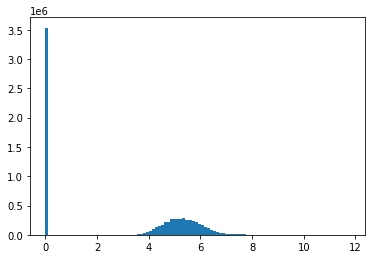

In [ ]:
import matplotlib.pyplot as plt

plt.hist(list(expr_train.to_numpy().reshape(1, expr_train.shape[0] * expr_train.shape[1])), bins = 100)
plt.show()

In [ ]:
expr_train.to_csv("/content/drive/MyDrive/scRNA/perturb_10_classes_train.csv")

In [16]:
expr_test = pd.DataFrame()
for number_lab, label in zip(range(len(perturb_list)),perturb_list):
      path = test_path + "/" + label + ".csv"
      df = pd.read_csv(path, index_col = 0)
      if expr_test.shape[0] == 0:
        expr_test = df
      else:
        expr_test = pd.merge(expr_test, df, how = "outer", left_index = True, right_index = True)

In [ ]:
expr_whole = pd.merge(expr_train, expr_test, how = "outer", left_index = True, right_index = True)

In [ ]:
expr_test.to_csv("/content/drive/MyDrive/scRNA/perturb_10_classes_test.csv")

## Preprocessing the data

**Let's see how the original data look like**
### The original expression values (all data)

In [ ]:
expr_train = expr_train.T

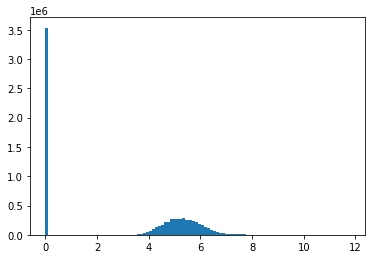

In [ ]:
import matplotlib.pyplot as plt

plt.hist(list(expr_train.to_numpy().reshape(1, expr_train.shape[0] * expr_train.shape[1])), bins = 100)
plt.show()

### The histagoram of one single cell

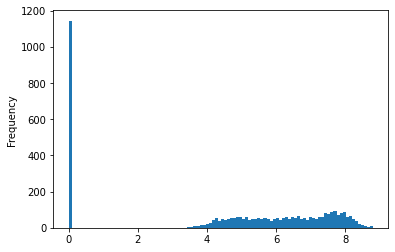

In [ ]:
expr_train[expr_train.columns[0]].plot.hist(bins = 100)

## Do some scale

### Divided by the sum of cell and do the sqrt

In [ ]:
for cell in expr_train.columns.to_list():
  expr_train[cell] = np.sqrt(expr_train[cell]/(expr_train[cell].sum()+0.001))

In [ ]:
for cell in expr_test.columns.to_list():
  expr_test[cell] = np.sqrt(expr_test[cell]/(expr_test[cell].sum()+0.001))

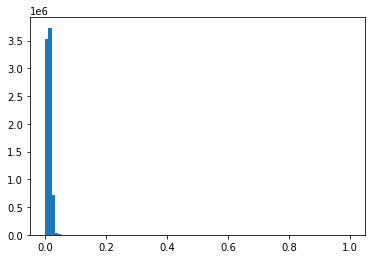

In [ ]:
plt.hist(list(expr_train.to_numpy().reshape(1, expr_train.shape[0] * expr_train.shape[1])), bins = 100)
plt.show()

# Divided by the 99% 

In [ ]:
expr_train

,GBP1,HLA-B,WARS,STAT1,MT2A,HIST1H4C,ID1,IRF1,UBE2L6,RPS4Y1,ID3,IL11,SPANXB1,CAV1,UBE2S,PSMB8,CD74,PMEPA1,MT-CO2,HLA-E,TAP1,TFPI2,LAP3,TPM1,PSMB9,SPP1,MT-CO3,NNMT,CXCL8,TYMS,ICAM1,PTTG1,CDKN3,CKS1B,FN1,LIMA1,IL1B,SERPINE1,SERPINE2,NEAT1,...,TMEM150B,DUOXA2,KCNK1,ADAM9,CALB1,AC112907.1,AGTRAP,LINC01826,COL20A1,AC007193.1,GK-AS1,INKA2,PLSCR1,LIMCH1,ITK,ARL14,DDX1,AL139300.1,AL391117.1,AC108174.1,ZNF208,NDUFS4,SLC5A5,LINC00908,OASL,SLC35F1,HIF3A,RPL3L,KCNJ11,MGAT1,LY75,CD5L,SALRNA1,RSPO3,FAM224B,OR52E4,NEUROD2,LINC01511,NUTM2G,WNT9A
CELL_42982,0.017307,0.014900,0.015963,0.000000,0.013642,0.015340,0.016396,0.015542,0.015937,0.000000,0.017526,0.018087,0.014040,0.017293,0.017509,0.013903,0.000000,0.017333,0.015988,0.017377,0.000000,0.014857,0.000000,0.016930,0.017827,0.017497,0.015832,0.016661,0.000000,0.016901,0.000000,0.020292,0.018539,0.018864,0.017329,0.015435,0.000000,0.016659,0.015719,0.015530,...,0.0,0.0,0.000000,0.020110,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.022200,0.021903,0.000000,0.0,0.018137,0.0,0.0,0.0,0.000000,0.018131,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020148,0.0,0.0,0.0,0.028251,0.0,0.0,0.0,0.0,0.0,0.0
CELL_9744,0.000000,0.000000,0.000000,0.000000,0.017271,0.018456,0.017385,0.000000,0.015219,0.017100,0.017749,0.017875,0.016567,0.015503,0.016453,0.000000,0.000000,0.017354,0.016358,0.000000,0.000000,0.015510,0.000000,0.017518,0.000000,0.016708,0.016173,0.014362,0.000000,0.019630,0.016225,0.000000,0.017807,0.015584,0.016905,0.015861,0.000000,0.018498,0.017511,0.017828,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.018716,0.0,0.0,0.0,0.000000,0.020133,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.020705,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
CELL_79203,0.021093,0.017838,0.018893,0.019620,0.015683,0.018156,0.014490,0.020472,0.019264,0.017873,0.016407,0.000000,0.016106,0.017046,0.015209,0.017538,0.020576,0.016860,0.015648,0.018057,0.019875,0.015562,0.019446,0.017534,0.019638,0.021756,0.015693,0.018079,0.000000,0.016442,0.019039,0.000000,0.018752,0.016533,0.017278,0.018657,0.022004,0.020172,0.016915,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.022215,0.0,0.0,0.0,0.0,0.0,0.025915,0.025611,0.148003,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.022578,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
CELL_93928,0.020824,0.015658,0.018437,0.018583,0.017470,0.000000,0.000000,0.019398,0.019131,0.000000,0.000000,0.000000,0.016578,0.016883,0.017094,0.018471,0.021343,0.000000,0.015613,0.017535,0.019823,0.016398,0.020670,0.015391,0.019133,0.019555,0.015441,0.017341,0.000000,0.017055,0.020062,0.000000,0.021076,0.018239,0.016097,0.016220,0.000000,0.018917,0.018359,0.016320,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.023329,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.021173,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
CELL_61444,0.020218,0.016801,0.019133,0.018969,0.017868,0.016977,0.014864,0.019220,0.018238,0.000000,0.016780,0.019094,0.018345,0.017510,0.015555,0.018322,0.000000,0.016921,0.015857,0.018008,0.020759,0.017930,0.019498,0.016761,0.020376,0.016926,0.015555,0.017044,0.000000,0.018996,0.020365,0.000000,0.018009,0.000000,0.016705,0.017664,0.023441,0.021577,0.017021,0.017187,...,0.0,0.0,0.000000,0.020900,0.0,0.0,0.022155,0.0,0.0,0.0,0.0,0.0,0.023071,0.000000,0.000000,0.0,0.020368,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.019492,0.0,0.0,0.0,0.031727,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CELL_82183,0.018370,0.015940,0.017077,0.019082,0.016708,0.017419,0.016767,0.020115,0.019396,0.018338,0.016220,0.000000,0.018016,0.014850,0.000000,0.018520,0.00000

In [ ]:
#whole_train = np.percentile(expr_train.to_numpy(),99)
#whole_test = np.percentile(expr_test.to_numpy(),99)
whole_train = np.median(expr_train.to_numpy())
whole_test = np.median(expr_test.to_numpy())
#whole_train = np.std(expr_train.to_numpy())

In [ ]:
expr_train.isna().sum()

GBP1         0
HLA-B        0
WARS         0
STAT1        0
MT2A         0
            ..
OR52E4       0
NEUROD2      0
LINC01511    0
NUTM2G       0
WNT9A        0
Length: 2000, dtype: int64

In [ ]:
expr_train = expr_train/whole_train
expr_test = expr_test/whole_test

In [ ]:
expr_train

,GBP1,HLA-B,WARS,STAT1,MT2A,HIST1H4C,ID1,IRF1,UBE2L6,RPS4Y1,ID3,IL11,SPANXB1,CAV1,UBE2S,PSMB8,CD74,PMEPA1,MT-CO2,HLA-E,TAP1,TFPI2,LAP3,TPM1,PSMB9,SPP1,MT-CO3,NNMT,CXCL8,TYMS,ICAM1,PTTG1,CDKN3,CKS1B,FN1,LIMA1,IL1B,SERPINE1,SERPINE2,NEAT1,...,TMEM150B,DUOXA2,KCNK1,ADAM9,CALB1,AC112907.1,AGTRAP,LINC01826,COL20A1,AC007193.1,GK-AS1,INKA2,PLSCR1,LIMCH1,ITK,ARL14,DDX1,AL139300.1,AL391117.1,AC108174.1,ZNF208,NDUFS4,SLC5A5,LINC00908,OASL,SLC35F1,HIF3A,RPL3L,KCNJ11,MGAT1,LY75,CD5L,SALRNA1,RSPO3,FAM224B,OR52E4,NEUROD2,LINC01511,NUTM2G,WNT9A
CELL_42982,1.080779,0.930471,0.996833,0.000000,0.851933,0.957952,1.023877,0.970560,0.995202,0.000000,1.094476,1.129478,0.876757,1.079885,1.093414,0.868226,0.000000,1.082433,0.998434,1.085158,0.000000,0.927759,0.000000,1.057237,1.113276,1.092623,0.988698,1.040439,0.000000,1.055435,0.000000,1.267199,1.157718,1.178018,1.082179,0.963858,0.000000,1.040293,0.981618,0.969814,...,0.0,0.0,0.000000,1.255841,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.386319,1.367769,0.000000,0.0,1.132608,0.0,0.0,0.0,0.000000,1.132229,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.258218,0.0,0.0,0.0,1.764234,0.0,0.0,0.0,0.0,0.0,0.0
CELL_9744,0.000000,0.000000,0.000000,0.000000,1.078539,1.152515,1.085644,0.000000,0.950373,1.067870,1.108411,1.116277,1.034605,0.968142,1.027486,0.000000,0.000000,1.083721,1.021516,0.000000,0.000000,0.968551,0.000000,1.093989,0.000000,1.043406,1.009986,0.896872,0.000000,1.225874,1.013208,0.000000,1.112041,0.973203,1.055670,0.990468,0.000000,1.155181,1.093498,1.113296,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.168772,0.0,0.0,0.0,0.000000,1.257271,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.292954,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
CELL_79203,1.317218,1.113917,1.179840,1.225235,0.979376,1.133821,0.904853,1.278430,1.202986,1.116145,1.024578,0.000000,1.005775,1.064470,0.949774,1.095213,1.284926,1.052894,0.977209,1.127605,1.241132,0.971801,1.214366,1.094942,1.226360,1.358613,0.980003,1.128969,0.000000,1.026768,1.188959,0.000000,1.171020,1.032446,1.078998,1.165098,1.374123,1.259720,1.056300,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.0,1.387266,0.0,0.0,0.0,0.0,0.0,1.618309,1.599376,9.242456,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.409960,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
CELL_93928,1.300391,0.977795,1.151347,1.160441,1.090996,0.000000,0.000000,1.211361,1.194676,0.000000,0.000000,0.000000,1.035276,1.054300,1.067508,1.153488,1.332835,0.000000,0.974990,1.095045,1.237875,1.024008,1.290770,0.961139,1.194831,1.221181,0.964259,1.082931,0.000000,1.065051,1.252831,0.000000,1.316180,1.139018,1.005223,1.012881,0.000000,1.181322,1.146457,1.019139,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.456828,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.322212,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
CELL_61444,1.262591,1.049218,1.194809,1.184594,1.115837,1.060191,0.928227,1.200258,1.138927,0.000000,1.047888,1.192357,1.145603,1.093487,0.971382,1.144152,0.000000,1.056670,0.990265,1.124589,1.296335,1.119667,1.217591,1.046708,1.272427,1.057007,0.971350,1.064357,0.000000,1.186248,1.271721,0.000000,1.124648,0.000000,1.043207,1.103057,1.463814,1.347408,1.062918,1.073318,...,0.0,0.0,0.000000,1.305141,0.0,0.0,1.383555,0.0,0.0,0.0,0.0,0.0,1.440741,0.000000,0.000000,0.0,1.271949,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.217205,0.0,0.0,0.0,1.981282,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CELL_82183,1.147146,0.995400,1.066394,1.191625,1.043382,1.087764,1.047056,1.256171,1.211255,1.145199,1.012907,0.000000,1.125059,0.927337,0.000000,1.156526,0.00000

### Plot after normalization
1. whole dataset

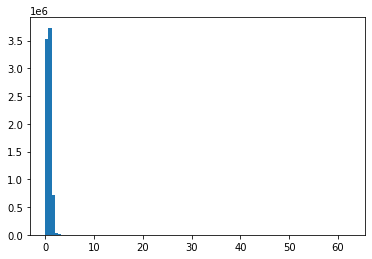

In [ ]:
plt.hist(list(expr_train.to_numpy().reshape(1, expr_train.shape[0] * expr_train.shape[1])), bins = 100)
plt.show()

#### one single cell

In [ ]:
expr_t = expr_train.T

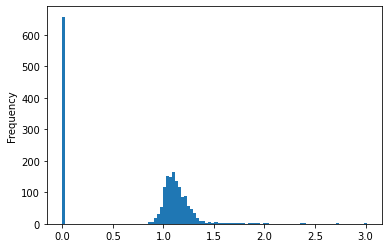

In [ ]:
expr_t[expr_t.columns[0]].plot.hist(bins = 100)

# Do normalization on each feature

# Read in meta

In [34]:
meta = pd.read_csv("/content/drive/MyDrive/scRNA/data/RNA_metadata.csv", index_col= 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
cell_list_train = expr_train.columns
cell_list_test = expr_test.columns
meta_train = meta.loc[cell_list_train]
meta_test = meta.loc[cell_list_test]
meta_train["perturb"] = meta_train.apply(lambda x: x.sgRNA.split("_")[0], axis = 1)
meta_test["perturb"] = meta_test.apply(lambda x: x.sgRNA.split("_")[0], axis = 1)

In [36]:
expr_train

,CELL_42982,CELL_9744,CELL_79203,CELL_93928,CELL_61444,CELL_49466,CELL_112865,CELL_142647,CELL_67074,CELL_106938,CELL_91884,CELL_64497,CELL_43505,CELL_123202,CELL_35750,CELL_149245,CELL_38432,CELL_182955,CELL_49138,CELL_176320,CELL_214174,CELL_157517,CELL_43774,CELL_71660,CELL_33939,CELL_107191,CELL_74837,CELL_82174,CELL_140322,CELL_99741,CELL_34110,CELL_172306,CELL_178336,CELL_109160,CELL_59296,CELL_182363,CELL_218281,CELL_112000,CELL_212493,CELL_22866,...,CELL_66848,CELL_154867,CELL_83375,CELL_44070,CELL_139445,CELL_134105,CELL_189449,CELL_19189,CELL_177545,CELL_78446,CELL_39993,CELL_132846,CELL_65225,CELL_50563,CELL_166744,CELL_192818,CELL_190979,CELL_207914,CELL_175525,CELL_147421,CELL_127596,CELL_137229,CELL_189837,CELL_138707,CELL_44158,CELL_118808,CELL_197539,CELL_31012,CELL_21858,CELL_146471,CELL_6331,CELL_216883,CELL_115175,CELL_112201,CELL_131759,CELL_82183,CELL_167090,CELL_84014,CELL_95816,CELL_183125
HLA-B,0.102805,-2.264989,0.508431,0.596618,0.298615,0.349778,0.250259,-2.264989,0.428681,0.331066,0.602815,0.483546,-2.264989,0.876293,-2.264989,0.448074,0.204672,0.482561,0.318051,0.740937,0.463923,0.322796,0.466626,0.371466,-2.264989,0.386741,0.341133,0.349321,0.750078,0.287065,0.204797,0.617003,0.767560,0.894481,0.571599,0.549483,0.508609,-2.264989,1.065924,0.354285,...,0.816828,0.626073,0.240107,0.317758,0.345488,0.401366,0.517063,0.175743,0.612485,0.363091,-2.264989,0.838792,0.479460,0.563719,0.533018,0.736660,1.015634,0.552219,0.744348,0.750418,0.497015,0.404421,0.442740,0.586319,-2.264989,0.373911,0.661178,0.262269,-2.264989,0.396070,0.224284,0.351286,0.654947,0.449917,0.608606,0.753455,0.455894,0.446728,0.261332,0.326849
GBP1,0.425356,-1.561113,0.765424,0.939052,0.612413,-1.561113,0.561149,0.749466,0.666579,0.640310,0.943355,0.727616,0.483652,0.881977,-1.561113,0.438887,-1.561113,0.531593,-1.561113,0.778853,0.474044,0.444829,0.602879,0.627646,-1.561113,0.706857,0.725820,0.664920,0.966922,0.698022,0.376448,0.580971,0.679109,1.136170,0.778284,-1.561113,0.582934,1.276109,1.059609,-1.561113,...,0.970928,0.712714,0.614621,0.540235,0.659426,0.536684,0.636540,-1.561113,0.541864,0.672038,-1.561113,1.108298,0.750740,-1.561113,0.539726,0.786600,-1.561113,0.523554,0.648517,0.655443,0.816379,0.704572,0.463774,0.897469,-1.561113,0.746222,-1.561113,-1.561113,-1.561113,0.538015,0.523800,0.521321,0.896987,0.773417,0.786034,0.938217,0.587992,0.710343,0.721184,0.434895
STAT1,-1.971030,-1.971030,0.634846,0.791701,0.468369,-1.971030,0.406589,-1.971030,0.518653,0.530995,0.749945,0.637215,0.340126,0.983575,-1.971030,0.394270,-1.971030,0.421663,0.336153,0.622179,0.456555,0.343493,0.476692,0.489385,0.445270,0.533522,0.624192,0.540416,0.814629,0.600970,0.282736,0.451591,0.564049,1.040378,0.669592,0.356296,0.523172,1.261613,1.000496,-1.971030,...,0.907875,0.592646,0.407193,0.404927,0.471683,0.551966,0.500954,0.159276,0.611784,0.550512,-1.971030,0.970774,0.583809,-1.971030,0.449883,0.704422,0.940932,0.454132,0.629289,0.676668,0.632551,0.567744,0.409246,0.769894,0.200357,0.595605,0.608805,-1.971030,0.318611,0.439216,-1.971030,0.414678,0.803178,0.588917,0.669367,0.944557,0.445320,0.570574,0.521180,0.338805
HIST1H4C,0.172479,0.458433,0.558296,-2.172152,0.345148,0.544733,0.103546,0.490903,0.416916,0.396479,0.662971,0.686808,0.423760,-2.172152,0.667151,0.184010,0.384533,0.482681,0.383711,0.549913,0.225172,0.228263,0.590690,0.232431,0.426934,-2.172152,0.406355,0.433757,-2.172152,0.353311,0.289133,0.540675,0.555045,-2.172152,0.714325,0.403897,0.348413,1.158428,0.886543,0.349039,...,0.849097,0.401556,0.260201,0.455569,0.300368,0.311177,0.441370,0.272881,0.519176,0.546304,-2.172152,0.894251,0.618779,0.624643,0.239018,-2.172152,0.861200,0.436491,-2.172152,0.657851,-2.172152,0.370759,0.168994,0.724590,0.528908,-2.172152,-2.172152,0.328983,0.471720,0.480646,0.590486,0.272391,-2.172152,0.569956,0.606582,0.875585,0.268679,0.544479,0.328063,0.360688
WARS,0.319073,-1.666994,0.641793,0.809321,0.533335,0.521849,0.488210,0.750669,0.611941,0.569624,0.806638

In [43]:
meta_train

,library_preparation_protocol,condition,MOI,sgRNA,UMI_count,perturb
CELL_42982,10X 3' v3 sequencing,Control,1,A2M_2,17154.0,A2M
CELL_9744,10X 3' v3 sequencing,Control,1,A2M_2,13110.0,A2M
CELL_79203,10X 3' v3 sequencing,IFNγ,1,A2M_1,7557.0,A2M
CELL_93928,10X 3' v3 sequencing,IFNγ,1,A2M_3,5199.0,A2M
CELL_61444,10X 3' v3 sequencing,IFNγ,1,A2M_1,11680.0,A2M
...,...,...,...,...,...,...
CELL_82183,10X 3' v3 sequencing,IFNγ,1,SLC19A1_2,4290.0,SLC19A1
CELL_167090,10X 3' v3 sequencing,Co-culture,1,SLC19A1_2,11183,SLC19A1
CELL_84014,10X 3' v3 sequencing,IFNγ,1,SLC19A1_3,8536.0,SLC19A1
CELL_95816,10X 3' v3 sequencing,IFNγ,1,SLC19A1_3,9056.0,SLC19A1


# Dataset class

In [19]:
class scRNACSV(Dataset):
  def __init__(self, expr, meta, transform = None, target_transform=None):
    self.expr = expr
    self.meta = meta
    self.cells = list(expr.columns)
    self.labels = list(meta["perturb"])
    self.samples = [(self.cells,self.labels[i]) for i in range(len(self.labels))]
    self.label_keys = list(set(self.labels))
    self.label_keys.sort()
    self.label_dic = {}
    for label, i in zip(self.label_keys, range(len(self.label_keys))):
      self.label_dic[label] = i
    print(f"This is the label dictionary of this dataset {self.label_dic}")
    self.transform = transform
    self.target_transform = target_transform
  def __len__(self):
    return self.expr.shape[1]

  def __getitem__(self,idx):
    one_cell = torch.from_numpy(np.array(self.expr.iloc[:,idx]))
    if self.transform:
      ret = self.transform(one_cell)
    else:
      ret = one_cell
    lab = self.label_dic[self.labels[idx]]
    
    return ret, self.label_dic[self.labels[idx]]

# Crop class

In [20]:
 class DINO_Crop(object):
  def __init__(self, global_crops_scale, local_crops_scale, local_crops_number):
    self.global_crops_scale = global_crops_scale
    self.local_crops_scale = local_crops_scale
    self.local_crops_number = local_crops_number
    
  def __call__(self, x):
    inputs = []
    data = x  
    length = x.shape[0]
    #print("This is the length")
    #print(length)
    global_size = int(length * self.global_crops_scale)
    global_index_1 = np.random.choice(length, size = global_size, replace = False)
    
    global_corr_1 = torch.from_numpy(global_index_1)
    
    global_data_1 = data[global_index_1,]
    global_input_1 = torch.cat([global_data_1, global_corr_1]).float()
    return global_input_1

In [21]:
crop = DINO_Crop(0.5,0.25,8)

In [37]:
train_dataset = scRNACSV(expr_train, meta_train, transform = crop)

This is the label dictionary of this dataset {'A2M': 0, 'CCND1': 1, 'DAG1': 2, 'FBL': 3, 'IDH2': 4, 'IFNGR1': 5, 'JAK1': 6, 'MIA': 7, 'PIK3IP1': 8, 'SLC19A1': 9}


In [38]:
test_dataset = scRNACSV(expr_test, meta_test, transform = crop)

This is the label dictionary of this dataset {'A2M': 0, 'CCND1': 1, 'DAG1': 2, 'FBL': 3, 'IDH2': 4, 'IFNGR1': 5, 'JAK1': 6, 'MIA': 7, 'PIK3IP1': 8, 'SLC19A1': 9}


In [39]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle = True)

# Supervised Train

In [25]:
def train_one_epoch(trainloader, simple_model, epoch, optimizer):
  running_loss = 0.0
  simple_model.train()
  lossF = nn.CrossEntropyLoss()
  sum_loss = 0
  num = 0
  for batch_idx, (data, label) in enumerate(trainloader):
    data, label = Variable(data).cuda(), Variable(label).cuda()
    #data, label = Variable(data), Variable(label)
    optimizer.zero_grad()
    output = simple_model(data)
    loss = lossF(output, label)
    sum_loss += loss
    num += 1
    loss.backward()
    optimizer.step()
    #plot_grad_flow(simple_model.named_parameters())
    if batch_idx % 100 == 0:
      print("Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss {:.6f}".format(
                epoch, batch_idx*len(data), len(trainloader.dataset),
                100.*batch_idx/len(trainloader), loss.item()))
  loss_stat = (sum_loss/num).detach().cpu().numpy().item()
  log_stats = {**{f'Average Loss': loss_stat}, 'epoch': epoch + 1}
  with (Path(output_dir) / "loss.txt").open("a") as f: f.write(json.dumps(log_stats) + "\n")

In [ ]:
os.chdir("/content/drive/Shareddrives/Documentation/Jiaxin_Li/Supervised_perturb/")

## Train loop

In [ ]:
os.chdir("/content/drive/Shareddrives/Documentation/Jiaxin_Li/Supervised_perturb/")
output_dir = './128+128_Seurat_scale_Aug29_final_try' ### customized your own output_dir
model = vits.vit_tiny()
optimizer = optim.Adam(model.parameters(), lr = 0.0001)
model.cuda()
Path(output_dir).mkdir(parents=True, exist_ok=True)
saveckp_freq = 1
to_restore = {"epoch": 0}
utils.restart_from_checkpoint(
    os.path.join(output_dir, "checkpoint.pth"),
    run_variables=to_restore,
    model=model,
    optimizer=optimizer,
)
start_epoch = to_restore["epoch"]
for epoch in range(start_epoch, 1000):
    model.train()
    train_one_epoch(train_loader, model, epoch, optimizer)
    # ============ writing logs ... ============
    save_dict = {
        'model': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'epoch': epoch + 1,
    }
    # Train loop
    if epoch % 3 == 0:
      correct, total = 0, 0
    
      with torch.no_grad():
        # Iterate over the test data and generate predictions
          for i, data in enumerate(train_loader, 0):
          # Get inputs
            inputs, targets = data
            inputs = inputs.cuda()
            targets = targets.cuda()
          # Generate outputs
            model.eval()
            outputs = model(inputs)
          # Set total and correct
            _, predicted = torch.max(outputs.data, 1)
            #print(predicted)
            #print(outputs)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            # Print accuracy
          train_acc = "%f %%" %(100 * correct / total)
          print(train_acc)
    # Testing loop
      correct, total = 0, 0
      with torch.no_grad():
        # Iterate over the test data and generate predictions
          for i, data in enumerate(test_loader, 0):
          # Get inputs
            inputs, targets = data
            inputs = inputs.cuda()
            #print(inputs.shape)
            #print(inputs)
            targets = targets.cuda()
          # Generate outputs
            model.eval()
            outputs = model(inputs)
          # Set total and correct
            _, predicted = torch.max(outputs.data, 1)
            #print(inputs[:,0:20])
            print(predicted)
            #print(outputs[:,0:10])
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
        # Print accuracy
          test_acc =  "%f %%" %(100 * correct / total)
          print(test_acc)
      acc_stats = {"Training Accuracy": train_acc, "Testing Accuracy":  test_acc, "epoch": epoch+1}
      with (Path(output_dir) / "acc.txt").open("a") as f: f.write(json.dumps(acc_stats) + "\n")
    utils.save_on_master(save_dict, os.path.join(output_dir, 'checkpoint.pth'))
    if saveckp_freq and epoch % saveckp_freq == 0:
        utils.save_on_master(save_dict, os.path.join(output_dir, f'checkpoint{epoch:04}.pth'))

Found checkpoint at ./128+128_Seurat_scale_Aug29_final_try/checkpoint.pth
=> loaded model from checkpoint './128+128_Seurat_scale_Aug29_final_try/checkpoint.pth' with msg <All keys matched successfully>
=> loaded optimizer from checkpoint './128+128_Seurat_scale_Aug29_final_try/checkpoint.pth'
Train Epoch: 224 [0/4014 (0%)]	Loss 2.250120
Train Epoch: 224 [1600/4014 (40%)]	Loss 2.096818
Train Epoch: 224 [3200/4014 (80%)]	Loss 1.949034
Train Epoch: 225 [0/4014 (0%)]	Loss 2.255025
Train Epoch: 225 [1600/4014 (40%)]	Loss 2.132586
Train Epoch: 225 [3200/4014 (80%)]	Loss 1.898897
20.976582 %
tensor([6, 0, 6, 0, 0, 4, 0, 0, 4, 6, 7, 0, 6, 6, 0, 7], device='cuda:0')
tensor([0, 0, 6, 7, 5, 0, 0, 7, 6, 0, 7, 0, 0, 6, 7, 7], device='cuda:0')
tensor([0, 0, 4, 0, 6, 6, 0, 7, 0, 6, 0, 7, 0, 6, 4, 7], device='cuda:0')
tensor([6, 7, 0, 0, 6, 7, 0, 4, 7, 0, 6, 6, 5, 7, 0, 6], device='cuda:0')
tensor([0, 0, 6, 4, 6, 6, 7, 0, 0, 6, 0, 0, 7, 7, 0, 6], device='cuda:0')
tensor([7, 0, 0, 0, 0, 0, 7, 0, 0, 6,

In [ ]:
expression_matrix_path = "/content/drive/MyDrive/scRNA/subset_all_genes/train"

In [ ]:
expr_hvg_train = pd.DataFrame()
for number_lab, label in zip(range(len(perturb_list)),perturb_list):
      path = expression_matrix_path + "/" + label + ".csv"
      df = pd.read_csv(path, index_col = 0)
      if expr_hvg_train.shape[0] == 0:
        expr_hvg_train = df
      else:
        expr_hvg_train = pd.merge(expr_hvg_train, df, how = "outer", left_index = True, right_index = True)

In [ ]:
newdata = pd.DataFrame()

In [ ]:
for cell in expr_hvg_train.columns:
  newdata[cell] = np.sqrt(expr_hvg_train[cell]/expr_hvg_train[cell].sum())

In [ ]:
x = newdata.to_numpy()

In [ ]:
x.shape

(95179968,)

In [ ]:
x.shape[0]*x.shape[1]

IndexError: ignored

In [ ]:
x = x.reshape(x.shape[0]*x.shape[1])

In [ ]:
max_x = x/x.max()

In [ ]:
std_x = x/x.std()

In [ ]:
mean_x = x/x.mean()

In [ ]:
median_x = x+1/np.median(x+1)

In [ ]:
p99_x = x/np.percentile(x,99)

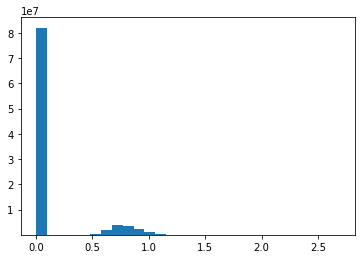

In [ ]:
import matplotlib.pyplot as plt
plt.hist(p99_x, bins= "auto")
  # arguments are passed to np.histogram
plt.ylim(1000)
plt.show()

In [ ]:
np.histogram(x, bins=100, range=None, normed=None, weights=None, density=None)

(array([82007124,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,        0,        0,        0,        0,
               0,        0,     6746,     6861,    44204,    73892,
          121304,   188762,   322587,   405865,   503619,   646571,
          733349,   770823,   735431,   835439,   790859,   818312,
          735084,   655736,   564671,   547569,   442225,   393381,
          359803,   321071,   264101,   254026,   207413,   179595,
          158029,   133382,   115569,   102323,    88002,    78422,
           72984,    68250,    62794,    59391,    53304,    47694,
           39643,    32426,    26138,    20652,    16534,    13320,
           10672,     8251,     6232,     4776,     4107,     3630,
            3191,     2914,     2498,     2011,     1484,     1190,
             963,      781,      666,      476, 

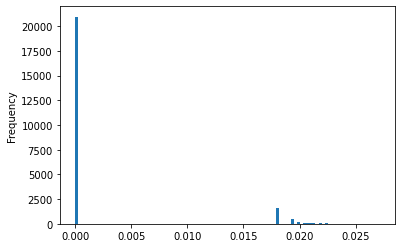

In [ ]:
newdata["CELL_107831"].plot.hist(bins = 100)

# UMAP

In [ ]:
pip install umap-learn

     |████████████████████████████████| 80 kB 6.9 MB/s 
     |████████████████████████████████| 1.1 MB 30.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=d008a4c2e86c080294877cf94e94b8f41fa2acc4dca12ced66d33842683c690d
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=ac5c2b27ae9d90b03180e358427154e3a49c872cc44c7c698b59ac57db766588
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [ ]:
pip install scprep

     |████████████████████████████████| 104 kB 15.1 MB/s 


In [ ]:
expr_train.transpose().to_numpy().shape

(1600, 30672)

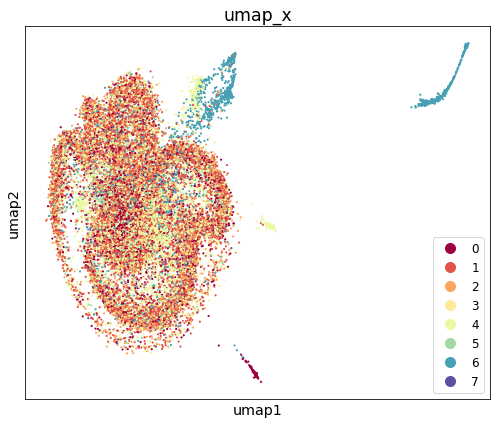

In [ ]:
import umap
from sklearn.preprocessing import StandardScaler
import scprep


## Then, run the following to plot the figure.

umap_operator = umap.UMAP(n_components=2) # n_components = 2: 2-dim umap 
Y_UMAP = umap_operator.fit_transform(expr_train.transpose().to_numpy()) 


### visualization ###
import matplotlib.pyplot as plt
fig, (ax1) = plt.subplots(1,1, figsize=(7, 6))

scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_x",
                      c=[train_dataset.label_dic[i] for i in train_dataset.labels], ticks=False, cmap='Spectral', ax=ax1)

#scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_y",
                      #c=y_cor, ticks=False, cmap='Spectral', ax=ax2) 
#scprep.plot.scatter2d(Y_UMAP, label_prefix="umap", title="umap_l2_norm",
                      #c=l2_norm, ticks=False, cmap='Spectral', ax=ax3) 

plt.tight_layout()
plt.show()

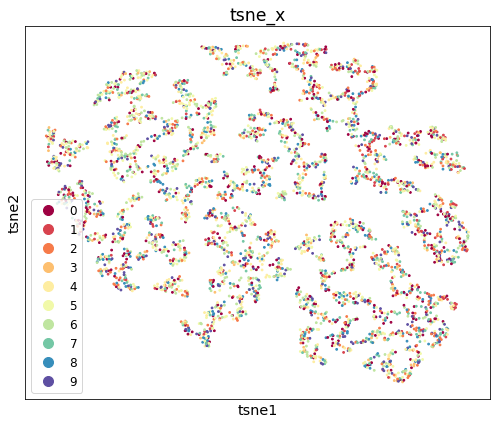

In [ ]:
import sklearn.decomposition # PCA
import sklearn.manifold # t-SNE
import time
pca_operator = sklearn.decomposition.PCA(n_components=2)
Y_pca = pca_operator.fit_transform(expr_train.transpose().to_numpy())
pca_operator = sklearn.decomposition.PCA(n_components=2)
tsne_operator = sklearn.manifold.TSNE(n_components=2)
Y_tsne = tsne_operator.fit_transform(pca_operator.fit_transform(expr_train.transpose().to_numpy()))
fig, (ax1) = plt.subplots(1,1, figsize=(7, 6))
scprep.plot.scatter2d(Y_tsne, label_prefix="tsne", title="tsne_x",
                      c=[train_dataset.label_dic[i] for i in train_dataset.labels], ticks=False, cmap='Spectral', ax=ax1)

plt.tight_layout()
plt.show()

# No Scaled Data

In [59]:
import os 
os.chdir("/content/drive/Shareddrives/Documentation/Data/bm/")

In [60]:
!gunzip /content/drive/Shareddrives/Documentation/Data/bm/rna_no_scale.csv

In [63]:
meta = pd.read_csv("/content/drive/Shareddrives/Documentation/Data/bm/meta.csv", index_col = 0)

In [65]:
expr = pd.read_csv("/content/drive/Shareddrives/Documentation/Data/bm/rna_no_scale.csv", index_col = 0)

In [66]:
expr

,a_AAACCTGAGCTTATCG.1,a_AAACCTGAGGTGGGTT.1,a_AAACCTGAGTACATGA.1,a_AAACCTGCAAACCTAC.1,a_AAACCTGCAAGGTGTG.1,a_AAACCTGCACGGTAGA.1,a_AAACCTGCACTTGGAT.1,a_AAACCTGCAGATGAGC.1,a_AAACCTGCAGATGGGT.1,a_AAACCTGCAGGCAGTA.1,a_AAACCTGCAGTGACAG.1,a_AAACCTGCATATACCG.1,a_AAACCTGGTACCCAAT.1,a_AAACCTGGTAGTACCT.1,a_AAACCTGGTCAGATAA.1,a_AAACCTGGTCCAGTGC.1,a_AAACCTGGTCTAGGTT.1,a_AAACCTGGTGCAGGTA.1,a_AAACCTGGTGGTCTCG.1,a_AAACCTGGTTTGTTTC.1,a_AAACCTGTCCTGTAGA.1,a_AAACCTGTCGAATGCT.1,a_AAACCTGTCGAGAGCA.1,a_AAACCTGTCGCATGAT.1,a_AAACCTGTCGCTTAGA.1,a_AAACCTGTCTAACGGT.1,a_AAACCTGTCTACTATC.1,a_AAACCTGTCTCCAACC.1,a_AAACCTGTCTGCTGCT.1,a_AAACGGGAGAAGATTC.1,a_AAACGGGAGACCTAGG.1,a_AAACGGGAGATCTGCT.1,a_AAACGGGAGGTAGCCA.1,a_AAACGGGAGGTGCTTT.1,a_AAACGGGAGGTGGGTT.1,a_AAACGGGAGTCTCGGC.1,a_AAACGGGAGTGAATTG.1,a_AAACGGGCAAACGCGA.1,a_AAACGGGCAACTGGCC.1,a_AAACGGGCAATCGGTT.1,...,b_TTTGGTTGTAGGAGTC.1,b_TTTGGTTGTAGGGTAC.1,b_TTTGGTTGTCGAGTTT.1,b_TTTGGTTGTCTAGTCA.1,b_TTTGGTTGTTCAGCGC.1,b_TTTGGTTGTTTGTGTG.1,b_TTTGGTTTCAACACGT.1,b_TTTGGTTTCACTTCAT.1,b_TTTGGTTTCAGCTCTC.1,b_TTTGGTTTCCATGAAC.1,b_TTTGGTTTCCTTGGTC.1,b_TTTGGTTTCGAGAGCA.1,b_TTTGGTTTCGGCTACG.1,b_TTTGGTTTCTTAACCT.1,b_TTTGTCAAGAGGTAGA.1,b_TTTGTCAAGAGTACCG.1,b_TTTGTCACAACGATGG.1,b_TTTGTCACACATTAGC.1,b_TTTGTCACACCGAATT.1,b_TTTGTCACACCTCGGA.1,b_TTTGTCACACGACGAA.1,b_TTTGTCACAGATAATG.1,b_TTTGTCACAGGAATCG.1,b_TTTGTCACATCACCCT.1,b_TTTGTCACATGCTGGC.1,b_TTTGTCAGTACCTACA.1,b_TTTGTCAGTACTTAGC.1,b_TTTGTCAGTATGCTTG.1,b_TTTGTCAGTATGGTTC.1,b_TTTGTCAGTCTGCCAG.1,b_TTTGTCATCAAAGTAG.1,b_TTTGTCATCAACACTG.1,b_TTTGTCATCACTTATC.1,b_TTTGTCATCAGCGACC.1,b_TTTGTCATCATAGCAC.1,b_TTTGTCATCCGAGCCA.1,b_TTTGTCATCCGTAGGC.1,b_TTTGTCATCCTCGCAT.1,b_TTTGTCATCGCCGTGA.1,b_TTTGTCATCGTTTGCC.1
IGKC,0.843808,0.0,0.000000,1.536502,2.727364,4.128886,1.552446,0.000000,4.118527,0.000000,0.00000,0.000000,2.266624,1.749696,0.000000,0.000000,0.000000,2.295417,2.404741,2.08718,2.305515,1.802253,0.000000,1.616515,0.000000,2.015163,2.292211,0.00000,0.000000,0.000000,1.049233,0.000000,0.0,1.527404,2.468521,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.214839,3.367682,1.475116,0.000000,1.438998,4.248003,2.436596,1.869331,0.000000,0.000000,1.579408,0.000000,1.397498,2.252157,2.007314,0.000000,0.919350,2.173866,1.874685,0.0,0.000000,2.069444,1.024476,0.765816,0.672600,1.63754,1.350774,1.898424,0.000000,2.290613,1.378545,3.363185,1.383451,0.0,1.477461,0.000000,1.70189,1.208354,2.146267,0.000000
HBA2,0.843808,0.0,0.000000,1.536502,0.000000,0.000000,0.000000,0.000000,2.779884,0.000000,0.00000,3.315371,0.000000,0.000000,1.522902,0.000000,0.000000,0.000000,1.798037,0.00000,0.000000,1.802253,0.000000,1.616515,0.000000,0.000000,1.377657,2.21593,2.182429,2.261602,0.000000,0.000000,0.0,0.000000,1.856686,0.000000,2.753347,0.000000,0.000000,0.000000,...,1.625305,2.079792,0.000000,0.000000,0.000000,1.354175,0.000000,0.000000,0.000000,0.000000,0.000000,1.754424,0.000000,0.000000,1.440226,2.383475,1.462526,0.832344,0.000000,0.0,0.000000,2.069444,4.723861,0.765816,3.978617,0.00000,1.905211,0.000000,0.000000,0.000000,0.000000,2.331530,1.942660,0.0,1.477461,1.466337,0.00000,0.000000,1.563694,0.000000
HBB,1.840680,0.0,3.332301,2.115847,2.354071,2.275195,2.133695,2.378428,3.164451,2.219578,1.65993,5.287761,1.672110,1.749696,2.100595,2.001757,2.580975,3.324522,2.404741,0.00000,0.000000,2.784386,1.438998,1.616515,0.000000,2.015163,0.000000,0.00000,0.000000,3.566537,4.535918,2.682028,0.0,2.469675,0.000000,2.773808,2.753347,2.190145,2.875145,2.535909,...,2.214839,0.000000,0.000000,0.000000,1.438998,0.000000,0.000000,1.319615,2.478969,0.000000,0.000000,0.000000,1.397498,1.344450,1.440226,1.778549,5.147311,0.000000,0.000000,0.0,0.000000,0.000000,6.606388,0.000000,5.660174,0.00000,1.350774,0.000000,1.791343,1.693870,0.000000,2.974884,1.383451,0.0,2.676024,0.000000,0.00000,1.208354,1.563694,1.370383
HBA1,0.000000,0.0,0.000000,1.536502,0.000000,0.000000,0.000000,1.449889,0.000000,0.000000,0.00000,3.895439,1.672110,0.000000,0.000000,2.001757,0.000000,0.000000,0.000000,0.00000,0.000000,1.802253,0.000000